# Aviation Exploration [placeholder title]

## Goals

#### Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

In [1]:
# All imports
# reminder to add ignore warning code at the end

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data

In [2]:
# Open data file

# Had to specify encoding 'latin-1' for file to load
# Setting low_memory=False in the read_csv function will force pandas to read the entire file at once, 
# which can help with inferring the correct data types. 

ad = pd.read_csv('Data/AviationData.csv', encoding='latin-1', low_memory=False)

### Initial Exploration

In [3]:
# Get initial info

ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
ad.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [5]:
ad.sample(n=10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
71763,20120605X24844,Accident,ERA12CA382,2012-05-12,"Savannah, GA",United States,032723N,0081204W,SAV,Savannah/Hilton Head Internati,...,Positioning,Riddell Enterprises,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain adequate visua...,25-09-2020
86888,20210914103855,Accident,ERA21LA356,2021-09-13,"Burt, NY",United States,431824N,0784442W,D80,OLCOTT-NEWFANE,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,30-09-2021
16556,20001213X35385,Accident,LAX87MA068A,1986-12-26,"LONG BEACH, CA",United States,NaN,NaN,LGB,LONG BEACH,...,Instructional,NaN,0.0,0.0,0.0,4.0,VMC,Maneuvering,Probable Cause,28-10-1988
21601,20001213X27058,Accident,FTW89LA002,1988-10-02,"HOUSTON, TX",United States,NaN,NaN,AAP,ANDRAU AIRPARK,...,Personal,NaN,0.0,0.0,0.0,4.0,VMC,Landing,Probable Cause,24-11-1989
77435,20151007X51551,Accident,ERA16LA003,2015-10-07,"Knoxville, TN",United States,035570N,0855116W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,Personal,NaN,0.0,0.0,2.0,0.0,IMC,NaN,The pilot's inadequate preflight weather plann...,03-12-2020
78762,20160810X81537,Accident,ANC16CA056,2016-08-08,"Chickaloon, AK",United States,614330N,0014849W,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,A partial loss of engine power due to carburet...,25-09-2020
12390,20001214X37056,Accident,CHI85LA304,1985-07-21,"BURLINGTON, WI",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,NaN
26275,20001212X23914,Accident,CHI90DEM08,1990-08-06,"HOLLAND, MI",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,15-05-1992
81179,20180213X95840,Incident,DCA18RA093,2018-02-13,"Lagos, Nigeria",Nigeria,NaN,NaN,NaN,Lagos,...,NaN,Delta Air Lines,0.0,9.0,0.0,135.0,NaN,NaN,NaN,25-09-2020
30734,20001211X14746,Incident,ANC92IA097,1992-06-26,"ANCHORAGE, AK",United States,NaN,NaN,ANC,ANCHORAGE INTERNATIONAL,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Taxi,Probable Cause,30-06-1993


Initial observations:

- 88888 rows and 31 columns
- 5 floats and 26 objects
- Column specifics denoted by a '.' followed by specification ('Airport.Code' & 'Airport.Name')
- Columns may need to be adjusted to different dtype
    - Event.Date -> date type
    - Publication.Date -> date type
- Columns may will need capitalization adjusted
- Outliers in numerical columns

In [6]:
# Assess the na

ad.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [7]:
# Assess missingness by percentage

ad.isna().sum()/len(ad)*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

#### Initial thoughts

- Might be able to create subset of injuries into one column
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
- Drop missing rows from
    - Location
    - Country
    - Make
    - Model
    - Amateur.Built
    - Injury.Severity
- Columns to drop that do not contribute to insights regarding aircrafts 
    - Latitude
    - Longitude
    - Airport.Code & Airport.Name
        - Cound include in Next Steps (which airports to focus on and pull separate data on that)
    - Schedule
    - Purpose.of.flight (is this something that can be helpful for next stage of business development?)
- Create subset analysis
    - Weather.Condition (how do aircrafts wheather in harsh conditions?)

##### Explore columns before deciding how to handle
- Aircraft.Category
- Registration.Number
- Number.of.Engins
- Engin.Type
- FAR.Description
- Schedule
- Air.Carrier
- Broad.phase.of.flight
- Report.Status
- Publication.Date (vs Event.Date which has 0 na)

#### Exploration of Column Values

In [8]:
# More than one record can have the same accident number with different details

ad['Event.Id'].value_counts()

20001212X19172    3
20001214X45071    3
20220730105623    2
20051213X01965    2
20001212X16765    2
                 ..
20001211X14216    1
20001211X14239    1
20001211X14207    1
20001211X14204    1
20221230106513    1
Name: Event.Id, Length: 87951, dtype: int64

In [9]:
# Change dtype to date
# Compare to publication date

ad['Event.Date'].value_counts()

1984-06-30    25
1982-05-16    25
2000-07-08    25
1983-08-05    24
1984-08-25    24
              ..
2014-03-16     1
2014-03-15     1
2014-03-12     1
2014-03-10     1
2022-12-29     1
Name: Event.Date, Length: 14782, dtype: int64

In [10]:
# Relevant to analysis --> Keep 

""" 

An accident is when damage is done to an aircraft or person whereas 
an incident is an event the could have caused an accident.


"""

ad['Investigation.Type'].value_counts()

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

In [11]:
# More than one record can have the same accident number with different details

ad['Accident.Number'].value_counts()

CEN22LA149    2
WPR23LA041    2
WPR23LA045    2
DCA22WA214    2
DCA22WA089    2
             ..
LAX92FA065    1
ANC92T#A12    1
MIA92LA049    1
NYC92LA048    1
ERA23LA097    1
Name: Accident.Number, Length: 88863, dtype: int64

In [12]:
# Adjust capitalization & drop na rows

ad['Location'].value_counts()

ANCHORAGE, AK          434
MIAMI, FL              200
ALBUQUERQUE, NM        196
HOUSTON, TX            193
CHICAGO, IL            184
                      ... 
Corona De Tucso, AZ      1
Lithonia, GA             1
BONANZA, OR              1
NEWPORT, PA              1
Brasnorte,               1
Name: Location, Length: 27758, dtype: int64

In [13]:
# Adjust capitalization & trim to get rid of numbers at the end

# Since the other columns with injury severity metrics are missing
# so much data, we can focus on this column for analysis
# and suggest we get a more complete data base to assess number 
# of injuries for phase 2 of business development

ad['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: Injury.Severity, Length: 109, dtype: int64

In [14]:
# Can imputate and na to 'Unknown' & adjust capitalization --> Keep
# Redistribute 'Unknowns' based on proportions of other categories

ad['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [15]:
# Can imputate and na to 'Unknown' & adjust capitalization --> Keep
# then can distribute unknown
ad['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [16]:
# Lowercase all letters

ad['Make'].value_counts()

Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: Make, Length: 8237, dtype: int64

In [17]:
# Not relevant for analysis --> Drop

ad['Registration.Number'].value_counts()

NONE      344
UNREG     126
None       65
UNK        13
USAF        9
         ... 
N93478      1
N519UA      1
N8840W      1
N21040      1
N9026P      1
Name: Registration.Number, Length: 79105, dtype: int64

In [18]:
# Needed for analysis --> Keep
# Missing ~7% of data
# Distribute na values based on probabily distribution of existing values

ad['Number.of.Engines'].value_counts(normalize=True)

1.0    0.840312
2.0    0.133796
0.0    0.014806
3.0    0.005833
4.0    0.005205
8.0    0.000036
6.0    0.000012
Name: Number.of.Engines, dtype: float64

In [19]:
# Adjust capitalization
# Missing ~8% of data

# Unknown, None, NONE, UNK

ad['Engine.Type'].value_counts(normalize=True)

Reciprocating      0.849875
Turbo Shaft        0.044113
Turbo Prop         0.041449
Turbo Fan          0.030326
Unknown            0.025070
Turbo Jet          0.008593
None               0.000232
Geared Turbofan    0.000147
Electric           0.000122
LR                 0.000024
NONE               0.000024
Hybrid Rocket      0.000012
UNK                0.000012
Name: Engine.Type, dtype: float64

In [20]:
# Too many na values and not enough significance for analysis --> Drop

ad['FAR.Description'].value_counts()

091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                                   4


In [21]:
# Not relevant to analysis --> Drop

ad['Schedule'].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

In [22]:
# Can imputate and na to 'Unknown' & adjust capitalization --> Keep

ad['Purpose.of.flight'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Personal
1        Personal
2        Personal
3        Personal
4        Personal
           ...   
88884    Personal
88885         NaN
88886    Personal
88887    Personal
88888    Personal
Name: Purpose.of.flight, Length: 88889, dtype: object>

In [23]:
# Too much missing data and not enough analytical significance --> Drop

ad['Air.carrier'].value_counts()

Pilot                        258
American Airlines             90
United Airlines               89
Delta Air Lines               53
SOUTHWEST AIRLINES CO         42
                            ... 
WOODY CONTRACTING INC          1
Rod Aviation LLC               1
Paul D Franzon                 1
TRAINING SERVICES INC DBA      1
MC CESSNA 210N LLC             1
Name: Air.carrier, Length: 13590, dtype: int64

In [24]:
# Would be good to keep this column and do analysis of safest aircraft

# Drop na if we don't lose too much other data after evaluating the rest of the columns

ad['Total.Uninjured'].value_counts()

0.0      29879
1.0      25101
2.0      15988
3.0       4313
4.0       2662
         ...  
558.0        1
412.0        1
338.0        1
401.0        1
455.0        1
Name: Total.Uninjured, Length: 379, dtype: int64

In [25]:
# Adjust capitalization and combine; unk & unknown

"""
Visual meteorological conditions (VMC) is an aviation flight category 
in which visual flight rules (VFR) flight is permitted—that is, conditions in which 
pilots have sufficient visibility to fly the aircraft maintaining visual separation 
from terrain and other aircraft. 

In aviation, instrument meteorological conditions (IMC) are weather conditions that 
require pilots to fly primarily by reference to flight instruments. Typically, this 
means flying in cloud or poor weather, where little or nothing can be seen or recognised 
when looking out of the window. 
"""

ad['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [26]:
# Combine 'unknown' & 'other'

ad['Broad.phase.of.flight'].value_counts(normalize=True)

Landing        0.249951
Takeoff        0.202401
Cruise         0.166370
Maneuvering    0.131942
Approach       0.106053
Climb          0.032953
Taxi           0.031722
Descent        0.030572
Go-around      0.021920
Standing       0.015310
Unknown        0.008878
Other          0.001928
Name: Broad.phase.of.flight, dtype: float64

In [27]:
# So much mixed information types, can't know what the numbers mean --> Drop

ad['Report.Status'].value_counts(normalize=True)

Probable Cause                                                                                                                                                       0.748461
Foreign                                                                                                                                                              0.024228
<br /><br />                                                                                                                                                         0.002024
Factual                                                                                                                                                              0.001757
The pilot's failure to maintain directional control during the landing roll.                                                                                         0.000679
                                                                                                                                  

In [28]:
# Since we have event date and there are 
# so many values missing we are dropping the column --> Drop

ad['Publication.Date'].value_counts(normalize=True)

25-09-2020    0.226564
26-09-2020    0.023550
03-11-2020    0.015376
31-03-1993    0.006017
25-11-2003    0.005272
                ...   
29-11-2004    0.000013
29-08-2001    0.000013
18-11-2004    0.000013
17-12-1996    0.000013
29-12-2022    0.000013
Name: Publication.Date, Length: 2924, dtype: float64

### Adjust dtype, Capitalization, and Imputate na to Separate Category

In [29]:
# Dropping rows of columns with few missing data
# Will not impact overall analysis

ad.dropna(inplace=True, 
          subset=['Location', 'Country', 'Make', 'Model','Amateur.Built',
                  'Injury.Severity','Total.Uninjured','Total.Fatal.Injuries',
                  'Total.Serious.Injuries','Total.Minor.Injuries'])
ad.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  50672
Longitude                 50671
Airport.Code              31646
Airport.Name              29363
Injury.Severity               0
Aircraft.damage            2142
Aircraft.Category         45755
Registration.Number         225
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          3956
Engine.Type                4800
FAR.Description           45964
Schedule                  62811
Purpose.of.flight          3603
Air.carrier               57491
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3059
Broad.phase.of.flight     24753
Report.Status              5442
Publication.Date          13104
dtype: i

In [30]:
# Create event year column

ad['Event.Year'] = ad['Event.Date'].str[:4]
ad['Event.Year']

0        1948
1        1962
3        1977
6        1981
7        1982
         ... 
88882    2022
88883    2022
88884    2022
88886    2022
88888    2022
Name: Event.Year, Length: 73047, dtype: object

In [31]:
# Convert Event.Year to int

ad['Event.Year']= ad['Event.Year'].astype(int)
ad['Event.Year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 73047 entries, 0 to 88888
Series name: Event.Year
Non-Null Count  Dtype
--------------  -----
73047 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


In [32]:
# Convert Injury columns to int

ad['Total.Fatal.Injuries']= ad['Total.Fatal.Injuries'].astype(int)
ad['Total.Serious.Injuries']= ad['Total.Serious.Injuries'].astype(int)
ad['Total.Minor.Injuries']= ad['Total.Minor.Injuries'].astype(int)
ad['Total.Uninjured']= ad['Total.Uninjured'].astype(int)
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73047 entries, 0 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                73047 non-null  object 
 1   Investigation.Type      73047 non-null  object 
 2   Accident.Number         73047 non-null  object 
 3   Event.Date              73047 non-null  object 
 4   Location                73047 non-null  object 
 5   Country                 73047 non-null  object 
 6   Latitude                22375 non-null  object 
 7   Longitude               22376 non-null  object 
 8   Airport.Code            41401 non-null  object 
 9   Airport.Name            43684 non-null  object 
 10  Injury.Severity         73047 non-null  object 
 11  Aircraft.damage         70905 non-null  object 
 12  Aircraft.Category       27292 non-null  object 
 13  Registration.Number     72822 non-null  object 
 14  Make                    73047 non-null

In [33]:
# Adjust capitalization to lowercase

# Create function to lowercase selected columns

def lowercase(df):
    df = df.apply(lambda x: x.str.lower())
    return df

# Imutate on database to lowercase all relevant columns

ad[['Purpose.of.flight','Make','Aircraft.Category','Engine.Type',
    'Location','Injury.Severity','Aircraft.damage']] \
= lowercase(ad[['Purpose.of.flight','Make','Aircraft.Category','Engine.Type',
                'Location','Injury.Severity','Aircraft.damage']])
ad['Engine.Type'].value_counts(normalize=True)

reciprocating      0.857986
turbo shaft        0.041203
turbo prop         0.038786
unknown            0.026785
turbo fan          0.026682
turbo jet          0.008059
none               0.000308
electric           0.000117
lr                 0.000029
hybrid rocket      0.000015
geared turbofan    0.000015
unk                0.000015
Name: Engine.Type, dtype: float64

In [34]:
# Adjust capitalization to uppercase

def uppercase(df):
    df = df.apply(lambda x: x.str.upper())
    return df

ad[['Weather.Condition']] = uppercase(ad[['Weather.Condition']])
ad['Weather.Condition'].value_counts(normalize=True)

VMC    0.915971
IMC    0.070612
UNK    0.013417
Name: Weather.Condition, dtype: float64

In [35]:
# Combine all versions of 'unknown' into one 'unknown'

ad.loc[ad['Engine.Type'] == 'unk', ['Engine.Type']] = 'unknown'
ad.loc[ad['Injury.Severity'] == 'unavailable', ['Injury.Severity']] = 'unknown'
ad.loc[ad['Weather.Condition'] == 'UNK', ['Weather.Condition']] = 'unknown'
ad.loc[ad['Broad.phase.of.flight'] == 'Other', ['Broad.phase.of.flight']] = 'Unknown'

print(ad['Number.of.Engines'].value_counts())
print(ad['Injury.Severity'].value_counts())
print(ad['Weather.Condition'].value_counts())
print(ad['Broad.phase.of.flight'].value_counts())

1.0    58468
2.0     8925
0.0      932
3.0      417
4.0      345
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64
non-fatal     56490
fatal          5248
fatal(1)       4653
fatal(2)       2771
incident       1548
              ...  
fatal(56)         1
fatal(37)         1
fatal(132)        1
fatal(68)         1
fatal(111)        1
Name: Injury.Severity, Length: 70, dtype: int64
VMC        64107
IMC         4942
unknown      939
Name: Weather.Condition, dtype: int64
Landing        11719
Takeoff         9906
Cruise          8194
Maneuvering     6440
Approach        5135
Climb           1625
Taxi            1499
Descent         1482
Go-around       1060
Standing         679
Unknown          555
Name: Broad.phase.of.flight, dtype: int64


In [36]:
# Adjust na value to it's own category

ad['Purpose.of.flight'].fillna('unknown', inplace=True)
ad['Aircraft.damage'].fillna('unknown', inplace=True)
ad['Aircraft.Category'].fillna('unknown', inplace=True)
ad['Injury.Severity'].fillna('unknown', inplace=True)
ad['Engine.Type'].fillna('unknown', inplace=True)
ad['Weather.Condition'].fillna('unknown', inplace=True)
ad['Broad.phase.of.flight'].fillna('Unknown', inplace=True)

print(ad['Purpose.of.flight'].isna().sum())
print(ad['Aircraft.damage'].isna().sum())
print(ad['Aircraft.Category'].isna().sum())
print(ad['Injury.Severity'].isna().sum())
print(ad['Engine.Type'].isna().sum())
print(ad['Weather.Condition'].isna().sum())
print(ad['Broad.phase.of.flight'].isna().sum())

0
0
0
0
0
0
0


In [37]:
# Confirm new 'unknown' count

# 30% of data is missing from the column, too much to redistribute
# Column could be useful for safety protocols

ad['Broad.phase.of.flight'].value_counts(normalize=True)

Unknown        0.346462
Landing        0.160431
Takeoff        0.135611
Cruise         0.112174
Maneuvering    0.088162
Approach       0.070297
Climb          0.022246
Taxi           0.020521
Descent        0.020288
Go-around      0.014511
Standing       0.009295
Name: Broad.phase.of.flight, dtype: float64

In [38]:
# Confirm new 'unknown' count

# too many missing values to redistribute based on proportions
# since the category is probably useful, 
# we'd want to evaluate it in a separate data set where we drop unknowns

# The option is to drop the entire column or rows with 'unknown'

ad['Aircraft.Category'].value_counts(normalize=True)

unknown              0.626528
airplane             0.318932
helicopter           0.040097
glider               0.005750
balloon              0.002628
weight-shift         0.002204
gyrocraft            0.002095
powered parachute    0.001246
ultralight           0.000329
wsft                 0.000123
powered-lift         0.000027
rocket               0.000014
blimp                0.000014
ultr                 0.000014
Name: Aircraft.Category, dtype: float64

In [39]:
# Confirm new 'unknown' count

ad['Purpose.of.flight'].value_counts(normalize=True)

personal                     0.565841
unknown                      0.134763
instructional                0.119868
aerial application           0.056279
business                     0.048079
positioning                  0.016578
other work use               0.013279
ferry                        0.009884
aerial observation           0.009076
public aircraft              0.007242
executive/corporate          0.006379
flight test                  0.003464
skydiving                    0.001506
external load                0.001424
air race show                0.001355
public aircraft - federal    0.001081
banner tow                   0.001040
public aircraft - local      0.000890
public aircraft - state      0.000684
glider tow                   0.000589
firefighting                 0.000452
air drop                     0.000096
asho                         0.000082
pubs                         0.000055
publ                         0.000014
Name: Purpose.of.flight, dtype: float64

In [40]:
# Combine all Boeing values into one

for value in ad:
    if ad['Make'].str.contains('boeing').any():
        ad.loc[ad['Make'].str.contains('fatal'), 'Make'] = 'boeing'

ad['Make'].value_counts(normalize=True)

cessna                 0.313209
piper                  0.172807
beech                  0.061057
bell                   0.029529
boeing                 0.023930
                         ...   
barriger               0.000014
pacheco                0.000014
sirocco flying club    0.000014
trickle                0.000014
royse ralph l          0.000014
Name: Make, Length: 6326, dtype: float64

In [41]:
# Combine all variations of 'fatal' values into one 'fatal' category

# We can now see there is an 'unavailable' and 'unknown' category into which we can add na values

# We can also then distribute the 'unknown' values based 
# on proportional distribution of the other categories

for value in ad:
    if ad['Injury.Severity'].str.contains('fatal').any():
        ad.loc[ad['Injury.Severity'].str.contains('fatal'), 'Injury.Severity'] = 'fatal'

ad['Injury.Severity'].value_counts(normalize=True)

fatal       0.973346
incident    0.021192
minor       0.002984
serious     0.002368
unknown     0.000110
Name: Injury.Severity, dtype: float64

### Higher Level Imputation (drop cols, impute on na with stat functions)

In [42]:
# Create copy of original data for column dropping

ad_1 = ad.copy()

# Drop rows past 1992 in Event.Year

mask = ad_1['Event.Year'] > 1991
ad_1 = ad_1[mask]

# Validate code worked 

ad_1['Event.Year'].min()

1992

In 1982 and 1991, there were major changes in technological inovations in aviation regulations. So we want data starting 1992 and on.

Source: https://www.faa.gov/about/history/brief_history

In [43]:
"""
These columns do not add value to analysis and are missing alot of data
    - Latitude
    - Longitude
    - Airport.Code
    - Airport.Name
    - Schedule
    - FAR.Description
    - Registration.Number
    - Report.Status
    - Publication.Date
    
Cound include in Next Steps suggestions for additional analysis when it's time
for phase 2 of business development
"""
# Drop unnecessary columns
ad_1 = ad.drop(['Airport.Code', 'Airport.Name', \
                'Schedule','Registration.Number','Latitude','Longitude', \
                'FAR.Description','Air.carrier', \
                'Report.Status','Publication.Date'], axis=1)

##### Missing ~7% of data from Number.of.Engines

ad['Number.of.Engines'].value_counts(normalize=True)

Original distribution:

- 1.0 = 0.843301
- 2.0 = 0.131095
- 0.0 = 0.014839
- 3.0 = 0.005778
- 4.0 = 0.004938
- 8.0 = 0.000036
- 6.0 = 0.000012

After distribution of na:
- 1.0 = 0.843790
- 2.0 = 0.130692
- 0.0 = 0.014778
- 3.0 = 0.005662
- 4.0 = 0.005033
- 8.0 = 0.000034
- 6.0 = 0.000011

In [44]:
# Observation: account for 1.5% of the missing data in the column
# Method: randomly select a class acccording to current distribution

# REMINDER: adjust dataframe name based on the rest of the doc

# Create copy of data base since this is a major imputation
ad_2 = ad_1.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.843301, 0.131095, 0.014839, 0.005778, 0.004938, 0.000036, 0.000012]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if pd.isna(value) == True:
        return np.random.choice([1.0,2.0,0.0,3.0,4.0,8.0,6.0], p=prob)
    else:
        return value
        
ad_2['Number.of.Engines'] = ad_2['Number.of.Engines'].map(lambda x: impute_pclass(x))
print(ad_2['Number.of.Engines'].value_counts(normalize=True))
print(ad_2['Number.of.Engines'].isna().sum())

1.0    0.846469
2.0    0.129040
0.0    0.013498
3.0    0.005969
4.0    0.004969
8.0    0.000041
6.0    0.000014
Name: Number.of.Engines, dtype: float64
0


##### Missing .09% of data from 'Injury.Severity'

ad['Injury.Severity'].value_counts(normalize=True)

Original distribution:

- fatal = 0.970089
- incident = 0.024512
- minor = 0.002494
- serious = 0.001979
- unavailable = 0.000926

After distribution of 'unavailable':
- fatal = 0.970970
- incident = 0.024546
- minor = 0.002494
- serious = 0.001990

In [45]:
# Observation: account for .09% of the data missing in the column
# Method: randomly select a class acccording to current distribution

# REMINDER: adjust dataframe name based on the rest of the doc

# Create copy of data base since this is a major imputation
ad_3= ad_2.copy()

# relative probabilities (likelihood of dif classes)
rel_prob = [0.970089, 0.024512, 0.002494, 0.001979]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['fatal','incident','minor','serious'], p=prob)
    else:
        return value
        
ad_3['Injury.Severity'] = ad_3['Injury.Severity'].map(lambda x: impute_pclass(x))
ad_3['Injury.Severity'].value_counts(normalize=True)

fatal       0.973455
incident    0.021192
minor       0.002984
serious     0.002368
Name: Injury.Severity, dtype: float64

##### Missing ~3% of data from 'Aircraft.damage'

ad['Aircraft.damage'].value_counts(normalize=True)

Original distribution:

- Substantial = 0.729328
- Destroyed = 0.210427
- Unknown = 0.031237
- Minor = 0.029007

After distribution of 'Unknown':

- Substantial = 0.753074
- Destroyed = 0.217027
- Minor = 0.029899

In [46]:
# Observation: account for ~3% of the data missing in the column
# Method: randomly select a class acccording to current distribution

# REMINDER: adjust dataframe name based on the rest of the doc

# Create copy of data base since this is a major imputation
ad_4= ad_3.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.729328, 0.210427, 0.029007]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['substantial','destroyed','minor'], p=prob)
    else:
        return value
        
ad_4['Aircraft.damage'] = ad_4['Aircraft.damage'].map(lambda x: impute_pclass(x))
ad_4['Aircraft.damage'].value_counts(normalize=True)

substantial    0.750681
destroyed      0.220036
minor          0.029283
Name: Aircraft.damage, dtype: float64

##### Missing ~1.3% of data from 'Weather.Condition'

ad['Weather.Condition'].value_counts(normalize=True)

Original distribution:

- VMC = 0.916614
- IMC = 0.070747
- UNKNOWN = 0.012639

After distribution of 'UNKNOWN':

- VMC = 0.928695
- IMC = 0.071305

In [47]:
# Observation: account for 1.3% of the data
# Method: randomly select a class acccording to current distribution

# REMINDER: adjust dataframe name based on the rest of the doc

# Create copy of data base since this is a major imputation
ad_5= ad_4.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.916614, 0.070747]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['VMC','IMC'], p=prob)
    else:
        return value
        
ad_5['Weather.Condition'] = ad_5['Weather.Condition'].map(lambda x: impute_pclass(x))
ad_5['Weather.Condition'].value_counts(normalize=True)

VMC    0.92806
IMC    0.07194
Name: Weather.Condition, dtype: float64

In [48]:
ad_5.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Event.Year                0
dtype: int64

In [49]:
ad_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73047 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                73047 non-null  object 
 1   Investigation.Type      73047 non-null  object 
 2   Accident.Number         73047 non-null  object 
 3   Event.Date              73047 non-null  object 
 4   Location                73047 non-null  object 
 5   Country                 73047 non-null  object 
 6   Injury.Severity         73047 non-null  object 
 7   Aircraft.damage         73047 non-null  object 
 8   Aircraft.Category       73047 non-null  object 
 9   Make                    73047 non-null  object 
 10  Model                   73047 non-null  object 
 11  Amateur.Built           73047 non-null  object 
 12  Number.of.Engines       73047 non-null  float64
 13  Engine.Type             73047 non-null  object 
 14  Purpose.of.flight       73047 non-null

### Statistical & Visualization Exploration

In [50]:
ad_5.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
count,73047.000000,73047.000000,73047.000000,73047.000000,73047.000000,73047.000000
mean,1.142744,0.510685,0.246444,0.303640,4.840651,1998.146837
std,0.439454,4.235008,1.478230,1.549842,26.160360,12.661842
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1987.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1995.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2011.000000
max,8.000000,295.000000,161.000000,171.000000,576.000000,2022.000000


Get rid of the outliers in Total.Uninjured

In [51]:
# Identify all outliers of Total.Uninjured
mask = ad_5['Total.Uninjured'].value_counts()
mask

0      28714
1      21118
2      13274
3       3608
4       2271
       ...  
399        1
322        1
265        1
339        1
368        1
Name: Total.Uninjured, Length: 363, dtype: int64

Text(0, 0.5, 'Outlier')

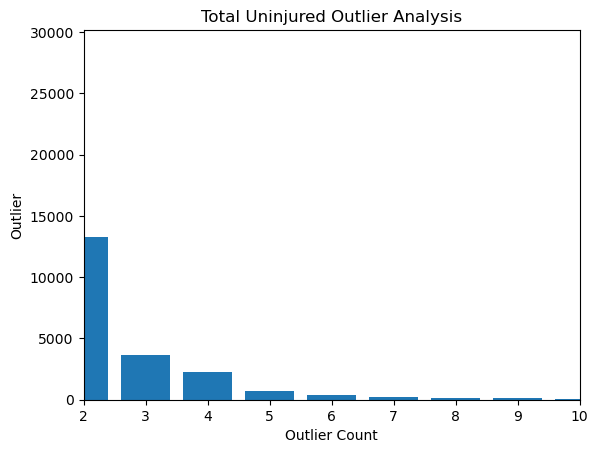

In [52]:
# Visualize outliers in Total.Uninjured

x = mask.index
y = mask.values

fig, ax = plt.subplots()

ax.bar(x,y)
plt.xlim(xmin=2, xmax=10)
ax.set_title('Total Uninjured Outlier Analysis')
ax.set_xlabel('Outlier Count')
ax.set_ylabel('Outlier')

Looks like it makes sense to get rid of outliers with values >4

In [53]:
# Eliminate outliers (>5) in Total.Uninjured

ad_6 = ad_5.copy()

mask = ad_6['Total.Uninjured'] < 5
ad_6 = ad_6[mask]

print(f"Value Count Check:\n{ad_6['Total.Uninjured'].value_counts()}")

# New describe check
ad_6.describe()

Value Count Check:
0    28714
1    21118
2    13274
3     3608
4     2271
Name: Total.Uninjured, dtype: int64


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
count,68985.000000,68985.000000,68985.000000,68985.000000,68985.000000,68985.000000
mean,1.100413,0.528637,0.228282,0.263260,0.979546,1998.082409
std,0.368499,4.259213,1.086931,0.771724,1.055338,12.655827
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1987.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1995.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2011.000000
max,8.000000,295.000000,161.000000,62.000000,4.000000,2022.000000


In [148]:
# Plotting functions

def plot_scatter(df, col1, col2, title, xlabel, ylabel):
    # Extract the relevant data
    x = df[col1]
    y = df[col2]
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot scatter plot
    ax.scatter(x,y)
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def plot_histogram(df, column, title, xlabel, ylabel):
    # Extract the relevant data
    data = ad_5[column]
    mean = data.mean(numeric_only=True)
    median = data.median(numeric_only=True)
    mode = data.mode().iloc[0]
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot histogram
    ax.hist(data, bins=1000)
    # Plot vertical line
    ax.axvline(mean, color="black")
    ax.axvline(median, color='green')
    ax.axvline(mode, color='blue')
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xlim(xmin=-1, xmax=30)


def plot_bar(df, cat, val, title, xlabel, ylabel):
    # Extract the relevant data
    x = cat
    y = val
    # Set up plot
    fig, ax = plt.subplots(figsize=(14,10))
    # Plot bar graph
    ax.bar(x,y,data=df)
    # Customize title and axes labels
    plt.xticks(rotation = 90)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


In [149]:
bins = ad['Total.Fatal.Injuries'].value_counts(bins=8).index

for bin in bins:
    print(bin)

(-0.296, 36.875]
(36.875, 73.75]
(73.75, 110.625]
(110.625, 147.5]
(147.5, 184.375]
(221.25, 258.125]
(184.375, 221.25]
(258.125, 295.0]


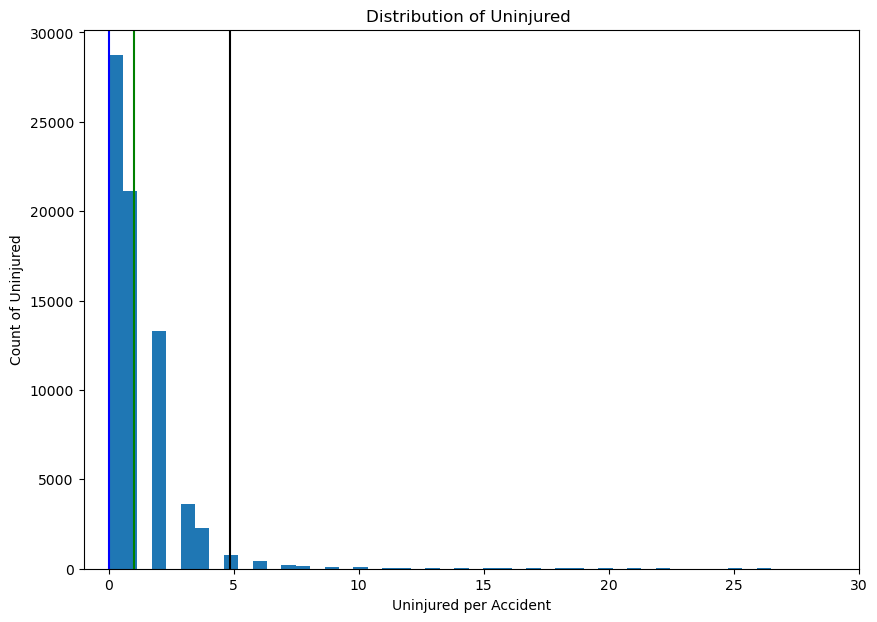

In [150]:
# Statistical analysis of Total.Uninjured before dropping na values

plot_histogram(
    ad_5,
    "Total.Uninjured",
    "Distribution of Uninjured ",
    'Uninjured per Accident',
    "Count of Uninjured"
)

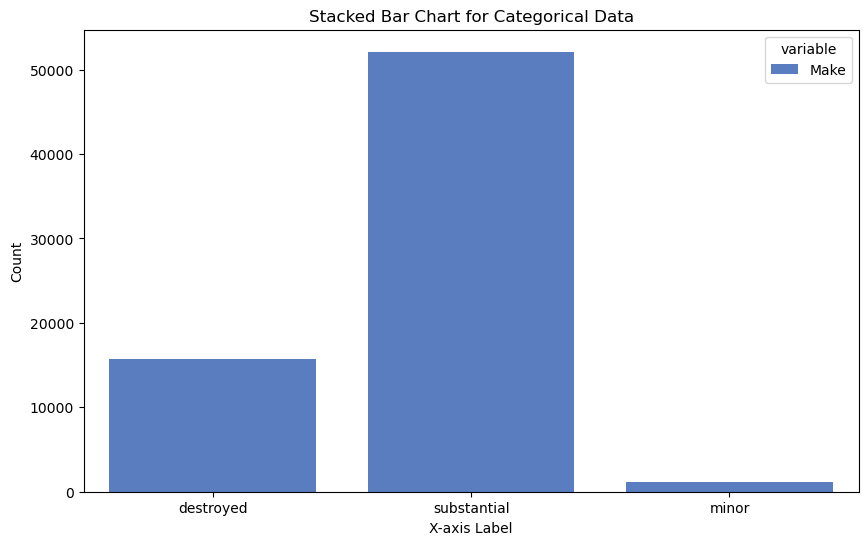

In [179]:
# Assuming 'df' is your DataFrame with categorical data
# and columns 'Category1', 'Category2', 'Category3'

# Melt the DataFrame to have a 'variable' column
df_melted = pd.melt(ad_6, id_vars=['Aircraft.damage'], value_vars=['Make'])

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Aircraft.damage', hue='variable', data=df_melted, palette='muted')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Count')
plt.title('Stacked Bar Chart for Categorical Data')

# Show the plot
plt.show()

In [171]:
top_make = ad_6['Make'].value_counts().index[:50]
top_make
top_damage = ad_6['Aircraft.damage'].sort_values(ascending=False).index
top_damage

Int64Index([36827, 47892, 48130, 48131, 48132, 48133, 48134, 48135, 48136,
            48137,
            ...
            64565, 20022, 20023, 20024, 20026, 20027, 20028, 20029, 20033,
                0],
           dtype='int64', length=68985)

In [155]:
ad_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68985 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                68985 non-null  object 
 1   Investigation.Type      68985 non-null  object 
 2   Accident.Number         68985 non-null  object 
 3   Event.Date              68985 non-null  object 
 4   Location                68985 non-null  object 
 5   Country                 68985 non-null  object 
 6   Injury.Severity         68985 non-null  object 
 7   Aircraft.damage         68985 non-null  object 
 8   Aircraft.Category       68985 non-null  object 
 9   Make                    68985 non-null  object 
 10  Model                   68985 non-null  object 
 11  Amateur.Built           68985 non-null  object 
 12  Number.of.Engines       68985 non-null  float64
 13  Engine.Type             68985 non-null  object 
 14  Purpose.of.flight       68985 non-null

In [168]:
ad_6['Aircraft.damage'].value_counts()

substantial    52119
destroyed      15714
minor           1152
Name: Aircraft.damage, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (68985,) and arg 1 with shape (50,).

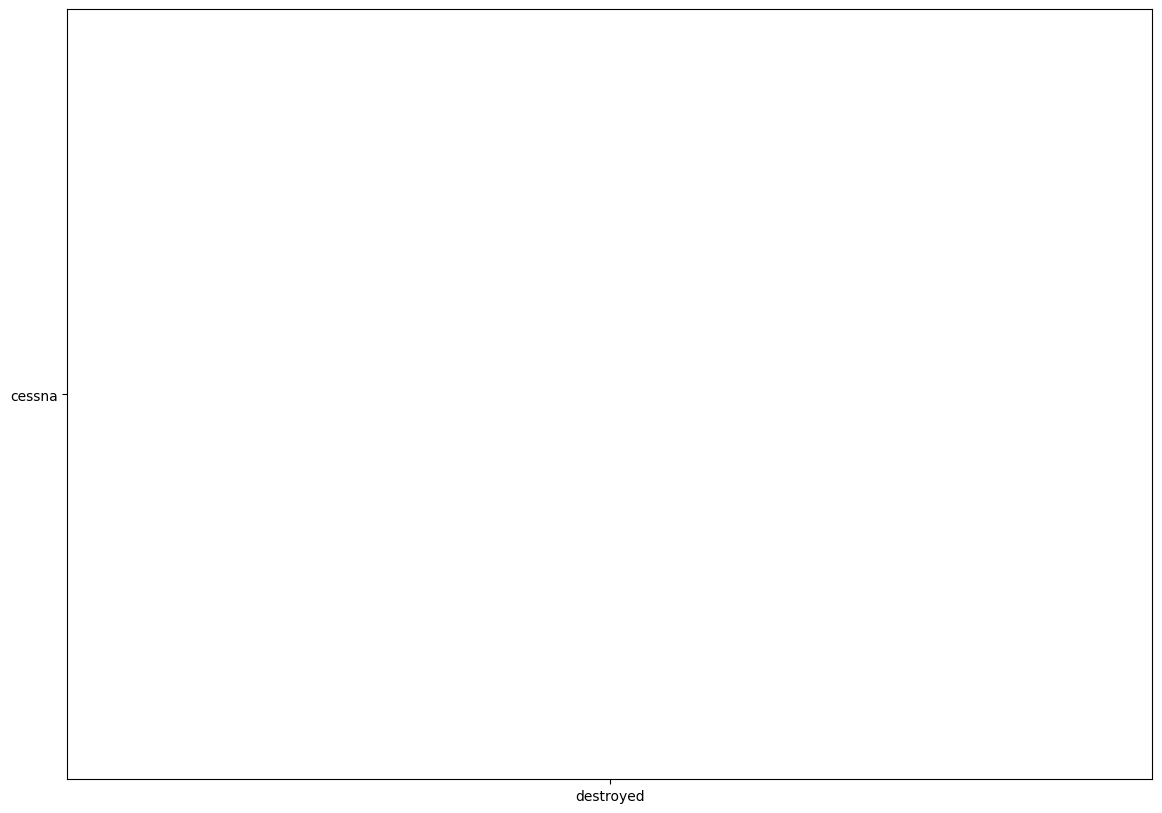

In [162]:
# Investigation.Type vs Injury.Severity

plot_bar(ad_6, ad_6['Aircraft.damage'], top_make,
         'data vs data', 'cat', 'val')